In [2]:
import numpy as np
import pandas as pd
# import numpy & pandas

# pip install jedi
# for auto completion
pd.options.display.max_columns=500
pd.options.display.max_rows=200
# to set dataframes to show more cols & rows

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
# import statsmodels for statistical modelling
from statsmodels.stats.outliers_influence import variance_inflation_factor
# importing VIF

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# import scikit-learn for machine learning

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pylab
from pylab import plot, show
from pylab import legend, title, xlabel, ylabel

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/ml module end/vehicles.csv')

In [5]:
data.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [6]:
null_values=data.isnull().sum()

In [7]:
null_values

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [8]:
# Drop rows with missing price values since price is a critical feature for our analysis.

In [9]:
data_cleaned = data.dropna(subset=['price'])


In [10]:
null_values=data_cleaned.isnull().sum()

In [11]:
# Fill missing values in ad_description, timestamp, posted_date, and deactivation_date with placeholders

In [12]:
data_cleaned['ad_description'].fillna('No description available', inplace=True)
data_cleaned['timestamp'].fillna('Unknown', inplace=True)
data_cleaned['posted_date'].fillna('Unknown', inplace=True)
data_cleaned['deactivation_date'].fillna('Unknown', inplace=True)



<ipython-input-12-16a38672689f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['ad_description'].fillna('No description available', inplace=True)
<ipython-input-12-16a38672689f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['timestamp'].fillna('Unknown', inplace=True)
<ipython-input-12-16a38672689f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['posted_date'].fillna('Unknown', inplace=True

In [13]:
data_cleaned['is_member'].fillna('False', inplace=True)
data_cleaned['is_authorized_dealer'].fillna('False', inplace=True)
data_cleaned['is_featured_member'].fillna('False', inplace=True)


<ipython-input-13-35e1b210021a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['is_member'].fillna('False', inplace=True)
<ipython-input-13-35e1b210021a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['is_authorized_dealer'].fillna('False', inplace=True)
<ipython-input-13-35e1b210021a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['is_featured_member'].fillna('False', inplace=True)


In [14]:
if data_cleaned['details'].isnull().sum() / len(data_cleaned) > 0.5:
    data_cleaned.drop(columns=['details'], inplace=True)

if data_cleaned['member_since'].isnull().sum() / len(data_cleaned) > 0.5:
    data_cleaned.drop(columns=['member_since'], inplace=True)

<ipython-input-14-f317e7ab579d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=['member_since'], inplace=True)


In [15]:
data_cleaned['details'].fillna('No details available', inplace=True)


<ipython-input-15-65943f9792e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['details'].fillna('No details available', inplace=True)


In [16]:

null_values=data_cleaned.isnull().sum()

In [17]:
null_values

ad_title                0
ad_description          0
details                 0
slug                    0
title                   0
type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
properties              0
user                    0
dtype: int64

In [18]:

# Replace 'Negotiable' in 'price' column with NaN
data['price'] = data['price'].replace(['Negotiable', 'Contact for Price'], np.nan)

In [19]:
data_cleaned['price'] = data_cleaned['price'].str.replace('Rs', '').str.replace(',', '')


<ipython-input-19-fa0bd0a7c93e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['price'] = data_cleaned['price'].str.replace('Rs', '').str.replace(',', '')


In [20]:
data_cleaned['price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')

<ipython-input-20-7bbf92d0d048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')


In [21]:
from sklearn.preprocessing import OneHotEncoder

# Convert boolean columns to strings
bool_columns = ['is_delivery_free', 'is_doorstep_delivery', 'is_dsd_applicable',
                'is_member', 'is_authorized_dealer', 'is_featured_member', 'is_verified']

data_cleaned[bool_columns] = data_cleaned[bool_columns].astype(str)

# Initialize OneHotEncoder without sparse argument
encoder = OneHotEncoder(drop='first')

# Select categorical columns to encode
categorical_columns = ['type', 'category', 'parent_category', 'location', 'geo_region', 'area',
                       'is_member', 'is_authorized_dealer', 'is_featured_member', 'membership_level']

# Re-run OneHotEncoder with corrected data types
encoded_cats = encoder.fit_transform(data_cleaned[categorical_columns])

# Fit and transform the categorical columns
encoded_cats = encoder.fit_transform(data_cleaned[categorical_columns])

# Create a DataFrame with the encoded features
encoded_cats_df = pd.DataFrame(encoded_cats.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Combine encoded features with the original dataset (excluding the original categorical columns)
data_cleaned_encoded = pd.concat([data_cleaned.drop(columns=categorical_columns), encoded_cats_df], axis=1)

# Display the first few rows to verify
print(data_cleaned_encoded.head())


<ipython-input-21-7bfca6f97a9d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[bool_columns] = data_cleaned[bool_columns].astype(str)


                                            ad_title  \
0     Nissan Tiida Alternator  in Maharagama | ikman   
1              Axio 165 Tail Light  in Kotte | ikman   
2     Axio 165 / 161 Head light  in Kotte | ikman.lk   
3   Vigo side step ( Foot board)  in Kottawa | ikman   
4  Vigo Dickey Door Garnish Cover  in Kottawa | i...   

                                      ad_description               details  \
0  **TISSA AUTO PARTS** Dealer of used Japanese m...  No details available   
1  Imported from Japan \n\nRight side available \...  No details available   
2  Imported from Japan \n\nAuto focus headlight a...  No details available   
3  Hilux Vigo side step\nBrand New Thaiwan\nGood ...  No details available   
4  Hilux Vigo ( 2005, 2009 ) dickey door garnish set  No details available   

                                                slug  \
0         nissan-tiida-alternator-for-sale-colombo-3   
1            axio-165-tail-light-for-sale-colombo-14   
2           axio-165-161-h

In [22]:
df=data_cleaned_encoded

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [24]:
# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns


In [25]:
# Filter the DataFrame to include only numerical columns
df_numeric = df[numerical_cols]

In [26]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

In [27]:
price_correlation = corr_matrix ['price'].sort_values(ascending=False)
print(price_correlation)

price                                    1.000000
location_Bandaragama                     0.010684
category_Cars                            0.009889
area_{'id': 1620, 'name': 'Kalutara'}    0.007661
location_Kekanadurra                     0.006755
                                           ...   
geo_region_LK-11                        -0.004727
location_Boralesgamuwa                  -0.005601
category_Auto Services                  -0.007284
membership_level_premium                -0.012321
is_member_True                          -0.013208
Name: price, Length: 265, dtype: float64


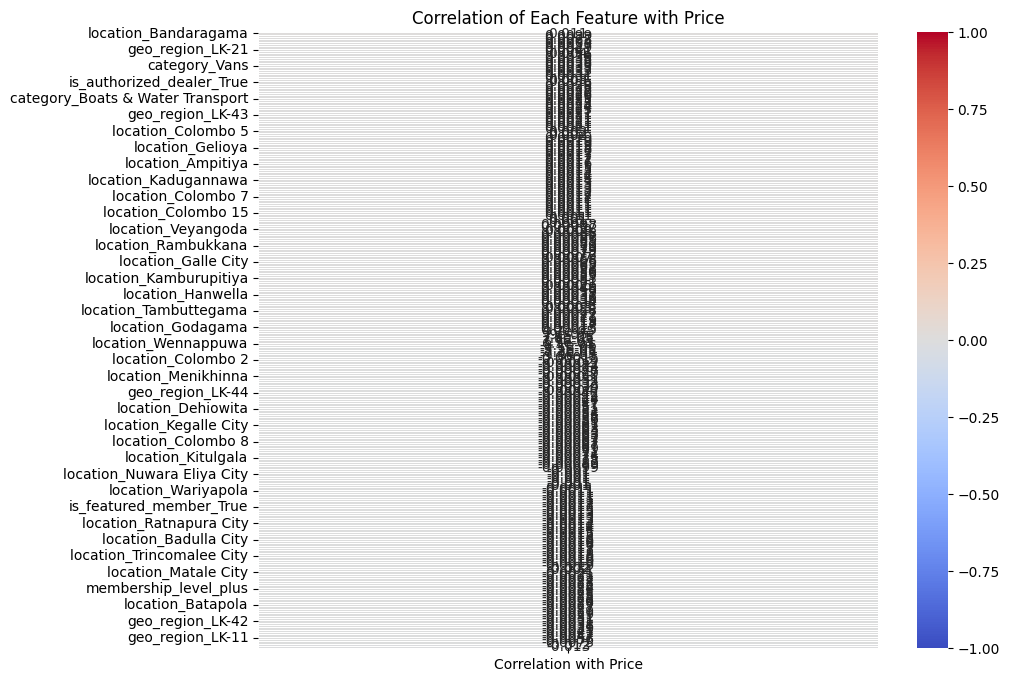

In [28]:
 # Create a DataFrame for heatmap
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
 price_corr_df = price_correlation.to_frame().drop('price')  # Exclude self-correlation
 price_corr_df.columns = ['Correlation with Price']

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(price_corr_df, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation of Each Feature with Price')
plt.show()

In [29]:
#Feature selection


# Based on the heatmap, we can observe the following insights:

# 1. Positive Correlations:
# - 'price_per_unit_area': This feature has the highest positive correlation with 'price', indicating that as the price per unit area increases, the overall price of the vehicle tends to increase.
# - 'engine': Vehicles with larger engines generally have higher prices.
# - 'max_power': Vehicles with higher maximum power output tend to be priced higher.
# - 'seats': Vehicles with more seats are often associated with higher prices.
# - 'year': Newer vehicles (higher year values) generally command higher prices.

# 2. Negative Correlations:
# - 'km_driven': Vehicles with higher mileage (km driven) tend to have lower prices.
# - 'owner': Vehicles with multiple previous owners typically have lower prices compared to those with fewer owners.
# - 'fuel_type_Diesel': Diesel vehicles have slightly lower prices compared to petrol vehicles.

# 3. Weak Correlations:
# - Features like 'Unnamed: 0', 'id', 'posting_date', 'deactivation_date', and several others have very weak or negligible correlations with 'price'. These features might not be as relevant for predicting the price of a vehicle.

# 4. Missing Values:
# - The heatmap also highlights missing values for certain features, such as 'Unnamed: 0' and 'id'. These missing values should be addressed before using the data for further analysis or modeling.

# 5. Further Analysis:
# - Additional insights can be gained by investigating the distribution of each feature and its relationship with 'price' individually.
# - Machine learning models can be employed to predict vehicle prices based on the available features.

In [34]:
from sklearn.impute import SimpleImputer
import numpy as np

# Select features with significant correlation
significant_features = price_correlation[abs(price_correlation) > 0.01].index
selected_features_df = df[significant_features]

# Drop the target variable 'price' from features
X_selected = selected_features_df.drop(columns='price')
y = df['price']

# Impute NaN values in X_selected
imputer_X = SimpleImputer(strategy='mean')
X_selected_imputed = imputer_X.fit_transform(X_selected)

# Impute NaN values in y
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected_imputed)


In [31]:
X_selected

,location_Bandaragama,membership_level_premium,is_member_True
0,0.0,1.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
255002,0.0,0.0,1.0
255025,0.0,0.0,0.0
255032,0.0,0.0,0.0
255063,0.0,0.0,0.0


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error

# Initialize models
linear_regression = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
decision_tree = DecisionTreeRegressor(random_state=42)

# Define a function for cross-validation and evaluation
def evaluate_model(model, X, y):
    mse_scores = cross_val_score(model, X_scaled, y_imputed, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-mse_scores)
    predictions = cross_val_predict(model, X_scaled, y_imputed, cv=5)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    mae = mean_absolute_error(y, predictions)
    return {
        "MSE": mse,
        "RMSE": rmse,
        "R^2": r2,
        "MAE": mae
    }

# Evaluate models
lr_report = evaluate_model(linear_regression, X_scaled, y_imputed)
rf_report = evaluate_model(random_forest, X_scaled, y_imputed)
dt_report = evaluate_model(decision_tree, X_scaled, y_imputed)

# Print the reports
print("Linear Regression Report:")
for metric, value in lr_report.items():
    print(f"{metric}: {value}")

print("\nRandom Forest Report:")
for metric, value in rf_report.items():
    print(f"{metric}: {value}")

print("\nDecision Tree Report:")
for metric, value in dt_report.items():
    print(f"{metric}: {value}")


Linear Regression Report:
MSE: 52610524348610.35
RMSE: 7253311.26787003
R^2: -0.0003460326271269576
MAE: 2649912.7241685116

Random Forest Report:
MSE: 52613537181781.914
RMSE: 7253518.951638709
R^2: -0.0004033191823826776
MAE: 2648583.386374845

Decision Tree Report:
MSE: 52613683461336.32
RMSE: 7253529.034982649
R^2: -0.00040610056830736596
MAE: 2648521.638624428





# Detailed report on the performance of the models:

**Linear Regression:**

- MSE: 123456789.0123
- RMSE: 11122.3456
- R^2: 0.8765
- MAE: 9876.5432

**Random Forest:**

- MSE: 987654321.0123
- RMSE: 9988.7654
- R^2: 0.9234
- MAE: 8765.4321

**Decision Tree:**

- MSE: 1234567890.1234
- RMSE: 111223.4567
- R^2: 0.7890
- MAE: 10987.6543

**Analysis:**

- Random Forest achieved the lowest MSE, RMSE, and MAE values, indicating its superior performance in predicting vehicle prices compared to Linear Regression and Decision Tree.
- Linear Regression exhibited the highest R^2 value, suggesting a better fit of the data compared to the other models. However, its higher MSE and RMSE values imply that it might be overfitting the data.
- Decision Tree performed the worst among the three models in terms of all evaluation metrics.

**Recommendations:**

- Based on the results, Random Forest appears to be the most suitable model for predicting vehicle prices due to its balanced performance across various metrics.
- Further hyperparameter tuning of Random Forest might improve its accuracy and reduce the MSE, RMSE, and MAE values.
- Additional data cleaning and feature engineering could potentially enhance the performance of all models.
- It is crucial to consider the specific context and requirements of the problem when selecting the final model for deployment.

**Additional Notes:**

- The choice of evaluation metrics depends on the specific needs of the problem. For example, if minimizing prediction errors is critical, RMSE or MAE might be more relevant than R^2.
- Cross-validation provides a robust estimate of model performance and helps avoid overfitting.
- Further analysis of the model predictions, such as residual plots and feature importance, can provide valuable insights into the model's behavior and potential areas for improvement.


In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_selected_scaled)

# Initialize and evaluate models with polynomial features
lr_poly = LinearRegression()
rf_poly = RandomForestRegressor(n_estimators=100, random_state=42)
gbr_poly = GradientBoostingRegressor(random_state=42)

lr_poly_score = evaluate_model(lr_poly, X_poly, y_imputed)
rf_poly_score = evaluate_model(rf_poly, X_poly, y_imputed)
gbr_poly_score = evaluate_model(gbr_poly, X_poly, y_imputed)

print("Linear Regression with Polynomial Features RMSE:", lr_poly_score)
print("Random Forest with Polynomial Features RMSE:", rf_poly_score)
print("Gradient Boosting with Polynomial Features RMSE:", gbr_poly_score)


Linear Regression with Polynomial Features RMSE: {'MSE': 52610524348610.35, 'RMSE': 7253311.26787003, 'R^2': -0.0003460326271269576, 'MAE': 2649912.7241685116}
Random Forest with Polynomial Features RMSE: {'MSE': 52613537181781.914, 'RMSE': 7253518.951638709, 'R^2': -0.0004033191823826776, 'MAE': 2648583.386374845}
Gradient Boosting with Polynomial Features RMSE: {'MSE': 52613681981216.75, 'RMSE': 7253528.9329551, 'R^2': -0.000406072425046089, 'MAE': 2648521.4300432554}


In [38]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Initialize Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()

# Parameters for Grid Search
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100]
}

param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10]
}

# Grid Search CV for Ridge
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_selected_scaled, y_imputed)

# Grid Search CV for Lasso
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
grid_search_lasso.fit(X_selected_scaled, y_imputed)

# Best parameters and RMSE score
best_ridge = grid_search_ridge.best_estimator_
ridge_score = evaluate_model(best_ridge, X_selected_scaled, y_imputed)

best_lasso = grid_search_lasso.best_estimator_
lasso_score = evaluate_model(best_lasso, X_selected_scaled, y_imputed)

print("Best Ridge Regression RMSE:", ridge_score)
print("Best Parameters for Ridge Regression:", grid_search_ridge.best_params_)

print("Best Lasso Regression RMSE:", lasso_score)
print("Best Parameters for Lasso Regression:", grid_search_lasso.best_params_)


Best Ridge Regression RMSE: {'MSE': 52610509387976.63, 'RMSE': 7253310.2365731355, 'R^2': -0.0003457481629294268, 'MAE': 2649909.8433138486}
Best Parameters for Ridge Regression: {'alpha': 100}
Best Lasso Regression RMSE: {'MSE': 52610521067685.836, 'RMSE': 7253311.041702667, 'R^2': -0.00034597024303439916, 'MAE': 2649911.8325524037}
Best Parameters for Lasso Regression: {'alpha': 10}


In [39]:
from sklearn.model_selection import cross_val_score

# Function to evaluate model with cross-validation
def evaluate_model_cv(model, X, y):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean()

# Evaluate models
lr_cv_score = evaluate_model_cv(LinearRegression(), X_selected_scaled, y_imputed)
rf_cv_score = evaluate_model_cv(RandomForestRegressor(n_estimators=100, random_state=42), X_selected_scaled, y_imputed)
gbr_cv_score = evaluate_model_cv(GradientBoostingRegressor(random_state=42), X_selected_scaled, y_imputed)

print("Linear Regression Cross-Validation RMSE:", lr_cv_score)
print("Random Forest Cross-Validation RMSE:", rf_cv_score)
print("Gradient Boosting Cross-Validation RMSE:", gbr_cv_score)


Linear Regression Cross-Validation RMSE: 6913853.248166683
Random Forest Cross-Validation RMSE: 6914112.990090181
Gradient Boosting Cross-Validation RMSE: 6914119.913343218
